In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Illustrated guide to Hypothesis testing using Python
This is a hands-on guide to hypothesis testing, where we use both "hand coded" and the common statistical libraries, to calculate different statistical test. 

I believe that implementing the statistical test manually without package could enforce my understanding and its also something that I notice many blog and medium posts were missing out on. Hopefully this post helps someone who are looking into this area or currently stuck with something.

Now, before we get into hypothesis testing, we have to talk about normal distribution, which is the biggest cog in the whole scheme of things, and some handy functions that we will use to calculate the important components of hypothesis testing.

## Normal Distribution

In [2]:
#generate samples of normal distribution
from scipy.stats import norm
import scipy

### Generating random numbers 
We could use numpy's rvs function to generate random samples for different types of distribution.
To generate them for normal distribution using the parameters to control mean and std dev:

In [3]:
r = norm.rvs(size=1000,loc=0, scale=1)

In [4]:
r[:10]

array([ 0.66212478, -1.65339907,  1.45667044, -0.04042188, -1.31145899,
       -2.18003051,  0.65521803, -0.50513195, -0.61816519,  0.91537042])

### Visualizing distribution using histogram
Histogram shows the frequency of the values.

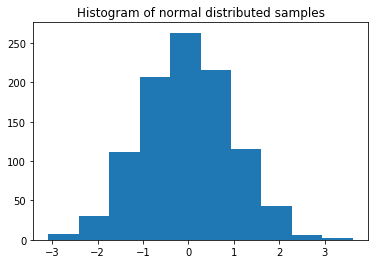

In [5]:
#visualize the normal distribution samples
plt.hist(r)
plt.title('Histogram of normal distributed samples')
plt.show()

### Probability Density Function (PDF)
If we normalize the proportion, we would get a PDF where we could estimate the probability of the random variable being a certain value. PDF = normalized version of a histogram.

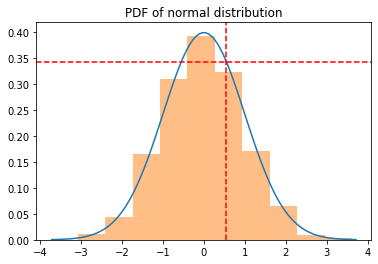

In [6]:
# linspace = Return evenly spaced numbers over a specified interval. params = start, stop, number of samples.
# used to generate uniform distribution samples
# in this case, we generate the ppf(std dev of the norm) for the plotting of X axis
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.plot(x, norm.pdf(x))
plt.hist(r, density=True, histtype='stepfilled', alpha=0.5)
plt.axvline(x=0.55,color='r',linestyle='dashed')
plt.axhline(y=0.342,color='r',linestyle='dashed')
plt.title('PDF of normal distribution')
plt.show()

It answers the question: under a normal distribution, what's the probablity of X being 1.4? We could use <b>numpy's pdf function</b> to find out:

In [7]:
# prob of 14.97% that random variable X has a value of 1.4
norm.pdf(1.4)

0.14972746563574488

However, saying that value at that specific point actually feels weird because it's techically a continuous variable. And the correct answer would be 0.

### Cumulative distribution function (CDF)

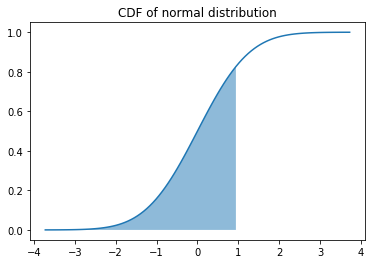

In [8]:
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.plot(x, norm.cdf(x))
plt.fill_between(x[x<=1], 0, norm.cdf(x)[x<=1].flatten(),alpha=0.5)
plt.title('CDF of normal distribution')
plt.show()

Using CDF, we could probe probabilties like PDF but over a interval of values: like what's the probability that X is less or equal 1.0? Or P(x<=X). In the real world, it could mean what's the probability of human's height between an interval.

In [9]:
# 1.0 refers to the end of the interval, 84% that X <= 1.0
norm.cdf(1.0)

0.8413447460685429

### Percent Point Function(PPF) - inverse CDF
It answers the question: given the probability P(x<=X), what's the value of X

In [10]:
norm.ppf(0.8413447460685429)

1.0

## Which statistical test for hypothesis testing?

In [11]:
#put diagram here..

## 1-sample Hypothesis testing for difference in means
Use case: When we want to compare a sample mean against a population mean, or a known value.

### 2-tail hypothesis testing

In [12]:
# Significant level(α)
alpha = 0.05/2 
# Critical value for α
crit_val = norm.ppf(1-alpha)
crit_val

1.959963984540054

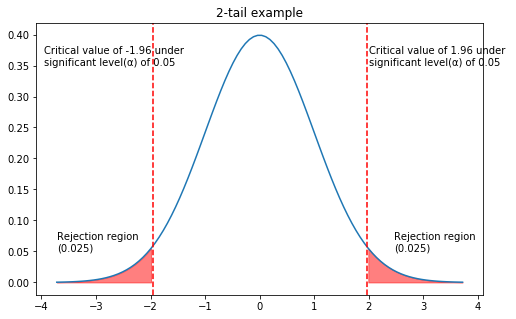

In [13]:
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.figure(figsize=(8,5))
plt.plot(x, norm.pdf(x))
plt.fill_between(x[x>crit_val], 0, norm.pdf(x)[x>crit_val].flatten(),alpha=0.5, color='red')
plt.fill_between(x[x<-crit_val], 0, norm.pdf(x)[x<-crit_val].flatten(),alpha=0.5, color='red') # for left tail
plt.axvline(x=crit_val,color='r',linestyle='dashed')
plt.axvline(x=-crit_val,color='r',linestyle='dashed') # for left tail
plt.text(crit_val+0.05, 0.35, 'Critical value of {} under \nsignificant level(α) of {}'.format(round(crit_val,2), str(alpha*2)), fontsize=10)
plt.text(-crit_val-2, 0.35, 'Critical value of {} under \nsignificant level(α) of {}'.format(round(-crit_val,2), str(alpha*2)), fontsize=10)# for left tail
plt.text(crit_val+0.5, 0.05, 'Rejection region\n('+str(alpha)+')', fontsize=10)
plt.text(-crit_val-1.75, 0.05, 'Rejection region\n('+str(alpha)+')', fontsize=10) #for left tail
plt.title('2-tail example')
plt.show()

The rejection region is split between 2 tail, which sums up to 0.05. <b>Note that the critical value under alpha of 0.05 is 1.96.</b>

The dashed red line depicts the signifcant level of 0.05. Using the CDF, we could calculate P(x>X) which is highlighted in the shaded area illustrated above and since CDF integrals x<=X, we do a 1-P(x<=X). What this shaded area also means is that if the test statistics lies in this shaded area, we would reject the null hypothesis as the p-value of the test-statistics is less than 0.05.

#### 2-tail Example 1 - Difference in means, low p-value
Let's say we have a hypothesis that the basketball players for team ABC are different(higher or lower) than the national level(population). So we draw a sample of 100 team ABC players' heights and determine if this distribution is different from the population's distribution, or in other words, compare the mean of the sample against a known value which is the population mean in this case.

Null Hypothesis($H_{0}$): There is <b>NO</b> difference between the height of team ABC basketball players and the country's.

Alternative hypothesis($H_{1}$): There is difference between the height of team ABC basketball players and the country's.

We generate some random samples to illustrate this example.

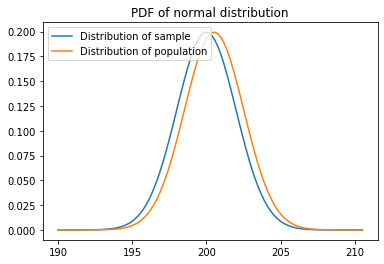

In [14]:
random.seed(888), np.random.seed(888) #very important: set random seed.
s1_mean,s1_stddev = 200, 2 # sample has mean of 200, std dev of 2
s1_samples = norm.rvs(size=100,loc=s1_mean, scale=s1_stddev)
pop_mu, pop_sigma = 200.52, 2 # population has mean of 210, std dev of 2
x = np.linspace(s1_mean-10, pop_mu+10, 100)
plt.plot(x, norm.pdf(x,s1_mean,s1_stddev), label='Distribution of sample')
plt.plot(x, norm.pdf(x, pop_mu, pop_sigma), label='Distribution of population')
#plt.fill_between(x[x>hl_z], 0, norm.pdf(x)[x>hl_z].flatten(),alpha=0.5)
#plt.axvline(x=sign_level_score,color='r',linestyle='dashed')
#plt.fill_between(x[x<=1], 0, norm.cdf(x)[x<=1].flatten(),alpha=0.5)
plt.title('PDF of normal distribution')
plt.legend(loc="upper left")
plt.show()

#### Calculate the Z-Score for difference in means
The formal and simplest Z-Score formula which was first introduced to many students is:
$$z = \frac{\bar{x}-\mu}{\sigma}$$
This is the case where we know the population standard dev(sigma).

In [15]:
(pop_mu-s1_samples.mean())/pop_sigma

0.20428400539231006

However, in practical, we don't have the population std dev. Therefore, we would either approximate it using sample std dev:
$$z = \frac{\bar{x}-\mu}{ \frac{s}{ \sqrt{n} } }$$
Important note: since we are <b>approximating</b> the sample std dev, we have to use the <a href='https://en.wikipedia.org/wiki/Standard_deviation#Corrected_sample_standard_deviation'><b>corrected std dev</b></a>:
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/df695c81f11c7d0d27209a42c72c20d2ad4e1fd2' width=200/>
The "N-1" corresponds to the number of degrees of freedom in the vector of deviations from the mean, and to yield the unbiased sample variance.

In [16]:
#hand coded, NOTE: np.std() accepts the ddof to handle the correction
z_score = (s1_samples.mean()-pop_mu) / (np.std(s1_samples, ddof=1)/np.sqrt(len(s1_samples)))
z_score

-2.0146215084517616

We use the CDF function to find out the area under curve for X<= z_score <b>under a normal distribution of mean 0 and std dev 1</b>, and multiple by 2 since it's a 2 tail test; the CDF returns 1 side of the tail, and we are checking for rejection region either at the left or right tail.

In [17]:
#find out p-value: manual method
#NOTE: we take the absolute of z-score because we want to retrieve the area(to the left) under a right-tail distribution setting
(1-norm.cdf(abs(z_score)))*2

0.04394432208981236

Alternatively, we could use the <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html"><b>statsmodel</b></a> library to do that. Important note: While it's easy to just plug in the numbers, it's worth knowing what goes under the hood to avoid testing the wrong things.

In [18]:
from statsmodels.stats.weightstats import ztest
#find out p-value: statsmodel method, 2 tail test
test_stat, p_value = ztest(x1=s1_samples, value=pop_mu, alternative='two-sided')
test_stat, p_value

(-2.0146215084517616, 0.043944322089812436)

It returns the same results as the manual calculation method. Phew! So what does this p-value means? Being close to 0(<0.05) means that there's a difference between the distribution, or there is a real difference in the mean.

In [19]:
first_z_score, first_p_val = z_score, p_value

#### Calculate t-score for difference in means
If the number of samples is small(<30), or the population std dev is unknown, it's recommended to use a t-test instead.
$$z = \frac{\bar{x}-\mu}{ \frac{s}{ \sqrt{n} } }$$
 where $df = n-1$

In [20]:
#hand coded, NOTE: np.std() accepts the ddof to handle the correction
t_score = (s1_samples.mean()-pop_mu) / (np.std(s1_samples, ddof=1)/np.sqrt(len(s1_samples)))
df = len(s1_samples)-1
t_score, df

(-2.0146215084517616, 99)

In [21]:
#find out p-value: manual method, NOTE: we use the absolute of t-score
from scipy.stats import t
(1-t.cdf(abs(t_score),df))*2

0.04665636936473416

Use the <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html'>scipy</a> package to perform the 1-sample t-test. Note that it returns results for 2-sided test only.

In [22]:
#find out p-value: scipy method, 2 tail test,
test_stat, p_value = scipy.stats.ttest_1samp(s1_samples, popmean=pop_mu)
test_stat, p_value

(-2.014621508451761, 0.04665636936473418)

p-value calculated from both hand coded and scipy's version are almost the same. The p-value is very close to the z-test version, possibly due to the large number of samples.

#### 2-tail example 2 - Difference in means, high p-value
Let's repeat the earlier with a closer distribution to simulate a case where there's no real difference, as seen in the tiny overlap below:

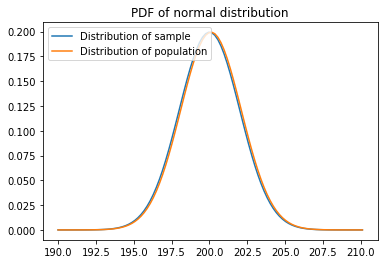

In [23]:
random.seed(888), np.random.seed(888) #very important: set random seed.
s1_mean,s1_stddev = 200, 2 # sample has mean of 200, std dev of 2
s1_samples = norm.rvs(size=100,loc=s1_mean, scale=s1_stddev)
pop_mu, pop_sigma = 200.1, 2 # population has mean of 210, std dev of 2
x = np.linspace(s1_mean-10, pop_mu+10, 100)
plt.plot(x, norm.pdf(x,s1_mean,s1_stddev), label='Distribution of sample')
plt.plot(x, norm.pdf(x, pop_mu, pop_sigma), label='Distribution of population')
#plt.fill_between(x[x>hl_z], 0, norm.pdf(x)[x>hl_z].flatten(),alpha=0.5)
#plt.axvline(x=sign_level_score,color='r',linestyle='dashed')
#plt.fill_between(x[x<=1], 0, norm.cdf(x)[x<=1].flatten(),alpha=0.5)
plt.title('PDF of normal distribution')
plt.legend(loc="upper left")
plt.show()

In [24]:
#hand coded, np.std() accepts the ddof to handle the corretion
z_score = (s1_samples.mean()-pop_mu) / (np.std(s1_samples, ddof=1)/np.sqrt(len(s1_samples)))
#find out p-value: manual method
z_score, (1-norm.cdf(abs(z_score)))*2

(0.0563703734746526, 0.9550467579570607)

In [25]:
#find out p-value: statsmodel method, 2 tail test
test_stat, p_value = ztest(x1=s1_samples, value=pop_mu, alternative='two-sided')
test_stat, p_value

(0.0563703734746526, 0.9550467579570608)

In this case, we the p-value is much higher(>0.05) and we fail to reject the null hypothesis. Just like what the plots are trying to tell us, there's no difference between the 2 distributions.

In [26]:
#hand coded, NOTE: np.std() accepts the ddof to handle the correction
t_score = (s1_samples.mean()-pop_mu) / (np.std(s1_samples, ddof=1)/np.sqrt(len(s1_samples)))
df = len(s1_samples)-1
#find out p-value: manual method
t_score, df, (1-t.cdf(abs(t_score), df))*2

(0.0563703734746526, 99, 0.9551603706476555)

In [27]:
#find out p-value: scipy method, 2 tail test,
test_stat, p_value = scipy.stats.ttest_1samp(s1_samples, popmean=pop_mu)
test_stat, p_value

(0.056370373474652596, 0.9551603706476554)

In [28]:
second_z_score, second_p_val = z_score, p_value

### 2-tail Rejection region illustration
An effective, intutitive to think about it is to recall the earlier plot(shown again here) of a normal distribution where the center is the difference of 0 between the 2 groups, and we want to find out if the z-score is within the rejection region.

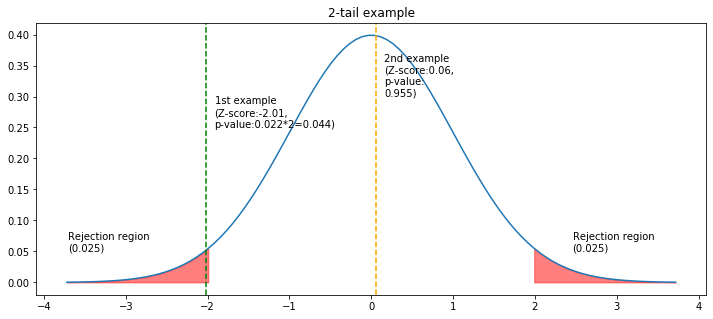

In [29]:
# Significant level(α) # Critical value for α
alpha, crit_val = 0.05, norm.ppf(1-alpha)
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.figure(figsize=(12,5))
plt.plot(x, norm.pdf(x))
plt.fill_between(x[x>crit_val], 0, norm.pdf(x)[x>crit_val].flatten(),alpha=0.5, color='red')
plt.fill_between(x[x<-crit_val], 0, norm.pdf(x)[x<-crit_val].flatten(),alpha=0.5, color='red') # for left tail
plt.axvline(x=first_z_score,color='green',linestyle='dashed') # for left tail
plt.axvline(x=second_z_score,color='orange',linestyle='dashed') # for left tail
plt.text(crit_val+0.5, 0.05, 'Rejection region\n('+str(alpha/2)+')', fontsize=10)
plt.text(-crit_val-1.75, 0.05, 'Rejection region\n('+str(alpha/2)+')', fontsize=10) #for left tail
plt.text(first_z_score+0.1, 0.25, '1st example\n(Z-score:{},\np-value:{}*2={})'.format(round(first_z_score,2), round(first_p_val/2,3), round(first_p_val,3)), fontsize=10) #for left tail
plt.text(second_z_score+0.1, 0.30, '2nd example\n(Z-score:{},\np-value:\n{})'.format(round(second_z_score,2), round(second_p_val,3)), fontsize=10) #for left tail
plt.title('2-tail example')
plt.show()

We could see that the z-score(green) is in the rejection region and that leads to rejection of null hypothesis. 
On the other hand, the z-score(orange) is not in the rejection region and that leads to failing to rejection of null hypothesis.

### 1-tail(right tail) hypothesis testing

In [30]:
# Significant level(α)
alpha = 0.05
# Critical value for α
crit_val = norm.ppf(1-alpha)
crit_val

1.6448536269514722

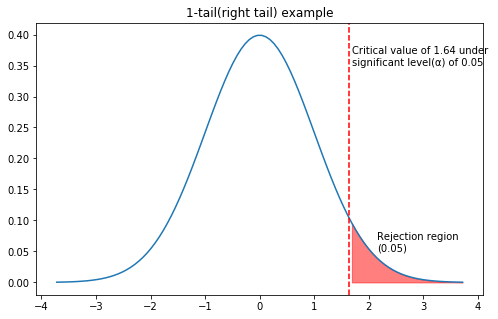

In [31]:
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.figure(figsize=(8,5))
plt.plot(x, norm.pdf(x))
plt.fill_between(x[x>crit_val], 0, norm.pdf(x)[x>crit_val].flatten(),alpha=0.5, color='red')
plt.axvline(x=crit_val,color='r',linestyle='dashed')
plt.text(crit_val+0.05, 0.35, 'Critical value of {} under \nsignificant level(α) of {}'.format(round(crit_val,2), str(alpha)), fontsize=10)
plt.text(crit_val+0.5, 0.05, 'Rejection region\n('+str(alpha)+')', fontsize=10)
plt.title('1-tail(right tail) example')
plt.show()

As compared to the earlier 2-tail example, in this 1-tail version, the rejection region is just on a </b>single tail</b> which is at 0.05. <b>Note that the critical value under alpha of 0.05 is 1.645 instead of 1.96</b>



#### 1-tail example 1 - Difference in means, low p-value
Let's say we have a hypothesis that the baseball players for team ABC are <b>higher</b> than the national level(population). So we draw a sample of 100 team ABC players' heights and determine if this distribution is different from the population's distribution, or in other words, compare the mean of the sample against a known value which is the population mean in this case.

Null Hypothesis($H_{0}$): There is <b>NO</b> difference between the height of team ABC basketball players and the country's.

Alternative hypothesis($H_{1}$): The height of team ABC basketball players is higher than the country's.

We generate some random samples to illustrate this example.

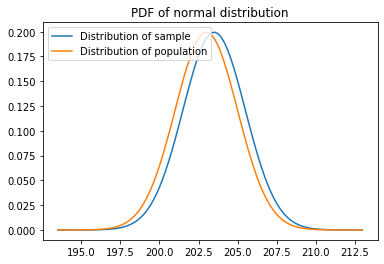

In [32]:
random.seed(888), np.random.seed(888) #very important: set random seed.
s1_mean,s1_stddev = 203.5, 2 # sample has mean of 200, std dev of 2
s1_samples = norm.rvs(size=100,loc=s1_mean, scale=s1_stddev)
pop_mu, pop_sigma = 203, 2 # population has mean of 210, std dev of 2
x = np.linspace(s1_mean-10, pop_mu+10, 100)
plt.plot(x, norm.pdf(x,s1_mean,s1_stddev), label='Distribution of sample')
plt.plot(x, norm.pdf(x, pop_mu, pop_sigma), label='Distribution of population')
#plt.fill_between(x[x>hl_z], 0, norm.pdf(x)[x>hl_z].flatten(),alpha=0.5)
#plt.axvline(x=sign_level_score,color='r',linestyle='dashed')
#plt.fill_between(x[x<=1], 0, norm.cdf(x)[x<=1].flatten(),alpha=0.5)
plt.title('PDF of normal distribution')
plt.legend(loc="upper left")
plt.show()

#### Calculate the Z-Score for difference in means
We use the same calculation method as explain earlier.

In [33]:
#hand coded, NOTE: np.std() accepts the ddof to handle the correction
z_score = (s1_samples.mean()-pop_mu) / (np.std(s1_samples, ddof=1)/np.sqrt(len(s1_samples)))
#find out p-value: manual method
z_score, 1-norm.cdf(z_score)

(3.014930204797961, 0.001285191987069445)

We do a 1-CDF because the CDF returns the area on the left area of the curve from the critical value, and we want the area on the right instead(red area hightlighted above)

In [34]:
#find out p-value: statsmodel method, 1-tail: NOTE: use "larger" for alternative param!
test_stat, p_value = ztest(x1=s1_samples, value=pop_mu, alternative='larger')
test_stat, p_value

(3.014930204797961, 0.0012851919870694563)

In [35]:
first_z_score, first_p_val = z_score, p_value

It returns the same results as the manual calculation method. Phew! So what does this p-value means? Being close to 0(<0.05) means that there's a difference between the distribution, or there is a real difference in the mean.

#### 1-tail example 2 - Difference in means, high p-value
Let's repeat the earlier with a closer distribution to simulate a case where there's no real difference, as seen in the tiny overlap below:

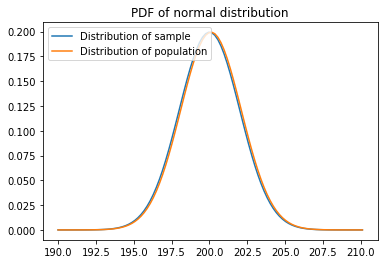

In [36]:
random.seed(888), np.random.seed(888) #very important: set random seed.
s1_mean,s1_stddev = 200, 2 # sample has mean of 200, std dev of 2
s1_samples = norm.rvs(size=100,loc=s1_mean, scale=s1_stddev)
pop_mu, pop_sigma = 200.1, 2 # population has mean of 210, std dev of 2
x = np.linspace(s1_mean-10, pop_mu+10, 100)
plt.plot(x, norm.pdf(x,s1_mean,s1_stddev), label='Distribution of sample')
plt.plot(x, norm.pdf(x, pop_mu, pop_sigma), label='Distribution of population')
#plt.fill_between(x[x>hl_z], 0, norm.pdf(x)[x>hl_z].flatten(),alpha=0.5)
#plt.axvline(x=sign_level_score,color='r',linestyle='dashed')
#plt.fill_between(x[x<=1], 0, norm.cdf(x)[x<=1].flatten(),alpha=0.5)
plt.title('PDF of normal distribution')
plt.legend(loc="upper left")
plt.show()

In [37]:
#hand coded, NOTE: np.std() accepts the ddof to handle the correction
z_score = (s1_samples.mean()-pop_mu) / (np.std(s1_samples, ddof=1)/np.sqrt(len(s1_samples)))
#find out p-value: manual method
z_score, 1-norm.cdf(abs(z_score))

(0.0563703734746526, 0.47752337897853037)

We do a 1-CDF because the CDF returns the area on the left area of the curve from the critical value, and we want the area on the right instead(red area hightlighted above)

In [38]:
#find out p-value: statsmodel method, 1-tail: NOTE: use "larger" for alternative param!
test_stat, p_value = ztest(x1=s1_samples, value=pop_mu, alternative='larger')
test_stat, p_value

(0.0563703734746526, 0.4775233789785304)

In this case, we the p-value is much higher(>0.05) and we fail to reject the null hypothesis. Just like what the plots are trying to tell us, there's no difference between the 2 distributions.

In [39]:
second_z_score, second_p_val = z_score, p_value

### 1-tail Rejection region illustration
An effective, intutitive to think about it is to recall the earlier plot(shown again here) of a normal distribution where the center is the difference of 0 between the 2 groups, and we want to find out if the z-score is within the rejection region.

In [40]:
crit_val

1.6448536269514722

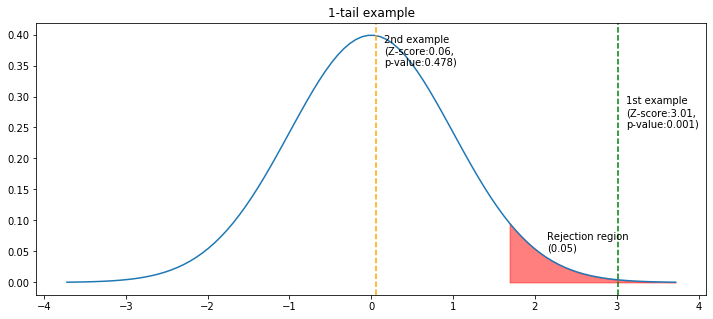

In [41]:
# Significant level(α)
alpha = 0.05
# Critical value for α
crit_val = norm.ppf(1-alpha)
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.figure(figsize=(12,5))
plt.plot(x, norm.pdf(x))
plt.fill_between(x[x>crit_val], 0, norm.pdf(x)[x>crit_val].flatten(),alpha=0.5, color='red')
plt.axvline(x=first_z_score,color='green',linestyle='dashed') # for left tail
plt.axvline(x=second_z_score,color='orange',linestyle='dashed') # for left tail
plt.text(crit_val+0.5, 0.05, 'Rejection region\n('+str(alpha)+')', fontsize=10)
plt.text(first_z_score+0.1, 0.25, '1st example\n(Z-score:{},\np-value:{})'.format(round(first_z_score,2), round(first_p_val,3)), fontsize=10) #for left tail
plt.text(second_z_score+0.1, 0.35, '2nd example\n(Z-score:{},\np-value:{})'.format(round(second_z_score,2), round(second_p_val,3)), fontsize=10) #for left tail
#plt.text(second_z_score+0.1, 0.35, 'Z-score for\n2nd example', fontsize=10) #for left tail
plt.title('1-tail example')
plt.show()

We could see that the z-score(green) is in the rejection region and that leads to rejection of null hypothesis. 
On the other hand, the z-score(orange) is not in the rejection region and that leads to failing to rejection of null hypothesis.

## 1-sample Hypothesis testing for difference in proportions

In [42]:
from scipy.stats import binom

We create a <b>Binomial distribution</b> to represent sample and population proportions using 100 coin flips(a series of Bernoulli trials), with 0.55 and 0.5 probability of head of each trial for sample and population respectively.

Note: each Bernoulli trial only has two possible outcomes(success or failure) and the p parameter describes the probabilty of success.

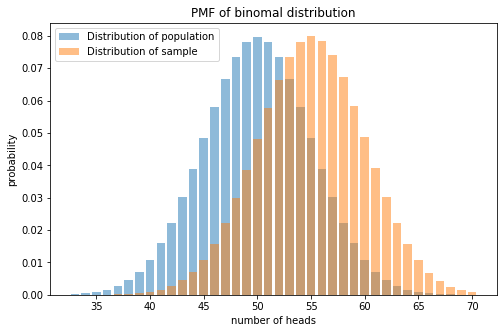

In [43]:
plt.figure(figsize=(8,5))
pop_n, pop_p = 100, 0.5
s1_samples_n, s1_samples_p = 100, 0.55
x = np.arange(binom.ppf(0.01, pop_n, pop_p)-5,binom.ppf(0.99, s1_samples_n, s1_samples_p)+5)
plt.bar(x, binom.pmf(x, n=pop_n, p=pop_p), alpha=0.5, label='Distribution of population')
plt.bar(x, binom.pmf(x, n=s1_samples_n, p=s1_samples_p), alpha=0.5, label='Distribution of sample')
plt.title('PMF of binomal distribution')
plt.legend(loc="upper left"), plt.xlabel('number of heads'), plt.ylabel('probability')
plt.show()

From the PMF, we could see that the distribution of population peaks at 55, which means out of 100 coin flips, we should get 55 heads most of the time. We could also see some probability of obtaining other numbers depending on the variance.

### 2-tail hypothesis testing
Null Hypothesis($H_{0}$): The coin is fair; There is <b>NO</b> difference between the sample coins and every other coins.

Alternative hypothesis($H_{1}$): The coin is unfair; There is difference between the sample coins and every other coins.

#### Calculate z-test for difference in proportions
$$z = \frac{\hat{p}-p_0}{  \sqrt{\frac{p_0(1-p_0)}{n}} }$$
 where the denonminator is actually the std dev of a Binomial distribution

In [44]:
# manual method
z_score = (s1_samples_p - pop_p)/(np.sqrt( (pop_p*(1-pop_p))/s1_samples_n))
z_score, (1-norm.cdf(abs(z_score)))*2

(1.0000000000000009, 0.3173105078629137)

Again, we could use the <a href='https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html'>z-test</a> for proportions function in statsmodel library to run the test in 1-liner:

In [45]:
#NOTE these parameters: 
#count: number of successes, nobs: number of trials, value: hypothesized population proportion
#alternative: The alt hypo, prop_var: use sample proportion to estimate(must set it to population proportion instead!)
from statsmodels.stats.proportion import proportions_ztest
count = int(s1_samples_n* s1_samples_p)
proportions_ztest(count, nobs=s1_samples_n, value=pop_p, alternative='two-sided', prop_var=0.50)

(1.0000000000000009, 0.3173105078629137)

At first I was having different results until I stumble upon <a href='https://stats.stackexchange.com/questions/447462/why-does-the-proportions-ztest-function-in-statsmodels-produce-different-values'>this helpful post</a> where someone had similar issues. It turns out that statsmodel has used the sample proportion for standard error calculation, by default.

Anyway, both methods gives us the same p-value.

## <font color='red'>Independent</font> 2-sample Hypothesis testing for difference in sample means
When we want to compare a sample mean against another sample means. Using which test depends on a few criteria: whether you know the population standard deviation behind the sample, and whether they are equal. Refer to the taxonomy for a visual breakdown.

<b>Use Case:</b>
Let's say we have draw 2 small samples:

1) Heights of 50 northern basketball players(out of 5000)

2) Heights of 50 southern basketball players(out of 5000)

and we want to find out if there's a difference between the height of the true population behind these samples(eg. all 5000 northern players are either taller or shorter than all 5000 southern players). Remember that sample is a representation or estimation of the population, and we are ultimately interested in inferring the conclusion in the context of whole population.

### 2-tail Example 1 - Difference in sample means

Null Hypothesis($H_{0}$): There is <b>NO</b> difference between the height of northen and southern basketball players.

Alternative hypothesis($H_{1}$): There is difference between the height of northen and southern basketball players.

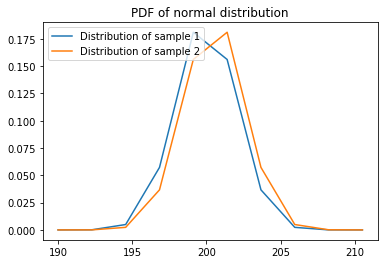

In [46]:
random.seed(888), np.random.seed(888) #very important: set random seed.
s1_mean,s1_stddev = 200, 2 # sample has mean of 200, std dev of 2
s1_samples = norm.rvs(size=50,loc=s1_mean, scale=s1_stddev)
s2_mean, s2_stddev = 200.52, 2 # population has mean of 210, std dev of 2
s2_samples = norm.rvs(size=50,loc=s2_mean, scale=s2_stddev)
x = np.linspace(s1_mean-10, s2_mean+10, 10)
plt.plot(x, norm.pdf(x,s1_mean,s1_stddev), label='Distribution of sample 1')
plt.plot(x, norm.pdf(x, s2_mean, s2_stddev), label='Distribution of sample 2')
plt.title('PDF of normal distribution')
plt.legend(loc="upper left")
plt.show()

### When you don't know the population standard deviation (<font color='red'>$\sigma_1,\sigma_2$ unknown</font>) and <font color='red'>$\sigma_1\neq\sigma_2$</font>
Using the same samples as before

#### Calculate 2-samples unpooled t-test for difference in mean
We use the <font color='red'><b>non-pooled</b></font> variance t-test or commonly known as Welch's t-test.

$$t = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{  \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}   } }$$
where degree of freedoms(df) is:
$$
df \approx \frac{\left(\frac{s_{1}^{2}}{N_{1}}+\frac{s_{2}^{2}}{N_{2}}\right)^{2}}{\frac{s_{1}^{4}}{N_{1}^{2} df_{1}}+\frac{s_{2}^{4}}{N_{2}^{2} df_{2}}}
$$
and $df_1$ and $df_2$ are the df for 1st and 2nd samples respectively.

We skip the manual version for this one because there's too many parts to this. We could use the statsmodels, <a href='https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html'>ttest_ind</a> function to caluclate the t-test.

In [47]:
from statsmodels.stats.weightstats import ttest_ind
# do a non-pool t-test by passing 'unequal' into the usevar to indicate the unequal var
t_stat, p_value, df = ttest_ind(s2_samples,s1_samples,alternative='two-sided',usevar='unequal')
t_stat, p_value, df 

(2.5207890108015234, 0.013439625952883746, 91.55812475043417)

It returns the t-statistics, p-value and the degree of freedoms used in the calculation.

### When you don't know the population standard deviation (<font color='red'>$\sigma_1,\sigma_2$ unknown</font>) and <font color='red'>$\sigma_1=\sigma_2$</font>

#### Calculate 2-samples pooled t-test for difference in mean
We use the <font color='red'><b>pooled</b></font> variance t-test:

$$t = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{ (S_p^2) \frac{1}{n_1} + \frac{1}{n_2}   } }$$
where the pooled variance is:
$$
s_{p}^{2}=\frac{\left(n_{1}-1\right) s_{1}^{2}+\left(n_{2}-1\right) s_{2}^{2}}{n_{1}+n_{2}-2}
$$

We skip the manual version for this one because there's too many parts to this. We could use the same statsmodels, <a href='https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html'>ttest_ind</a> function to caluclate the t-test.

In [48]:
from statsmodels.stats.weightstats import ttest_ind
# do a non-pool t-test by passing 'pooled' into the usevar to indicate the unequal var
t_stat, p_value, df = ttest_ind(s2_samples,s1_samples,alternative='two-sided',usevar='pooled')
t_stat, p_value, df 

(2.5207890108015234, 0.013323109728081253, 98.0)

It returns the t-statistics, p-value and the degree of freedoms used in the calculation.

### When you do know the population standard deviation (<font color='red'>$\sigma_1,\sigma_2$ known</font>)

#### Calculate 2-samples z-test for difference in mean
In this case, we could just use the 2-samples z test for difference in means:

$$
z=\frac{\bar{x}_{1}-\bar{x}_{2}}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}}
$$

We skip the manual version for this one because there's too many parts to this. We could use the same statsmodels, <a href='https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html'>ttest_ind</a> function to caluclate the t-test.

<b>NOTE</b>: just like the earlier example, we need to put in ddof=1 for the <a href="https://en.wikipedia.org/wiki/Bessel%27s_correction">Bessel's correction</a>.

In [49]:
# manual version
z_score = (s1_samples.mean() - s2_samples.mean()) / (np.sqrt( (np.var(s1_samples,ddof=1)/len(s1_samples)) + (np.var(s2_samples,ddof=1)/len(s2_samples))  ))
z_score, (1-norm.cdf(abs(z_score)))*2

(-2.5207890108015234, 0.011709203788805356)

We could again use the same <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html"><b>statsmodel's z-test function</b></a> to do that.

In [50]:
from statsmodels.stats.weightstats import ztest
test_stat, p_value = ztest(x1=s1_samples,x2=s2_samples, alternative='two-sided')
test_stat, p_value

(-2.5207890108015234, 0.011709203788805373)

## <font color='red'>Dependent</font> 2-sample Hypothesis testing for difference in sample means
When we want to compare a before and after effect by using an intervention on the <b>same experimental units</b>. 

<b>Use Case:</b>
Let's say we have a drug that claims to enhance jumping ability and we want to test this drug on a group of basketball players. We measure their jump(cm) before and after consuming of this drug.

### 2-tail Example 1 - Difference in sample means

Null Hypothesis($H_{0}$): There is <b>NO</b> difference in the jump height.

Alternative hypothesis($H_{1}$): There is difference in the jump height.

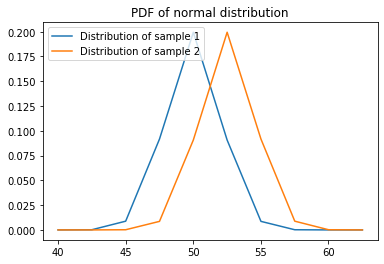

In [51]:
random.seed(888), np.random.seed(888) #very important: set random seed.
s1_mean,s1_stddev = 50, 2 # sample has mean of 200, std dev of 2
s1_samples = norm.rvs(size=60,loc=s1_mean, scale=s1_stddev)
s2_mean, s2_stddev = 52.52, 2 # population has mean of 210, std dev of 2
s2_samples = norm.rvs(size=60,loc=s2_mean, scale=s2_stddev)
x = np.linspace(s1_mean-10, s2_mean+10, 10)
plt.plot(x, norm.pdf(x,s1_mean,s1_stddev), label='Distribution of sample 1')
plt.plot(x, norm.pdf(x, s2_mean, s2_stddev), label='Distribution of sample 2')
plt.title('PDF of normal distribution')
plt.legend(loc="upper left")
plt.show()

#### Calculate paired t-test for difference in mean

Notice that: This formula looks very similar to the 1-sample t-test difference in means ($\sigma$ unknown) that we have previously used but in this case, we are using the <b>differences</b> between the 2 samples for calculation and both sample sizes have to be the same. I know it sounds like cheating: We are indirectly reframing it into a 1-sample t-test.

$$t = \frac{\bar{x}_D-\mu}{ \frac{s_D}{ \sqrt{n_D} } }$$

where df = n-1, $\bar{x}_D$ is the mean of the differences and $\mu$ is 0 because we hypothesized that there's 0 difference. 

In [52]:
from scipy.stats import t
diff = s1_samples - s2_samples
t_score = (np.mean(diff) - 0) / (np.std(diff, ddof=1)/np.sqrt(len(diff)))
df = len(s1_samples)-1
t_score, (1-t.cdf(abs(t_score),df))*2, df

(-7.167830542580345, 1.4061010134014396e-09, 59)

We could use the <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html'>scipy's ttest_rel</a> function to perform the 2-sample paired t-test.

In [53]:
from scipy.stats import ttest_rel
# note that it returns the p-value for 2-sided test!
test_stat, p_value = ttest_rel(s1_samples,s2_samples)
test_stat, p_value

(-7.167830542580344, 1.406101031262486e-09)

## 2-sample Hypothesis testing for difference in proportions

In [54]:
from scipy.stats import binom

Use case example: We are interested in finding out whether 2 coins are created equal and whether there's a difference between them.

We create 2 <b>Binomial distributions</b> to represent coin flips from 2 different coins. For simulation, we perform 100 coin flips(a series of Bernoulli trials), with 0.55 and 0.5 probability of getting heads of each trial , for each samples respectively.

Note: each Bernoulli trial only has two possible outcomes(success or failure) and the p parameter describes the probabilty of success.

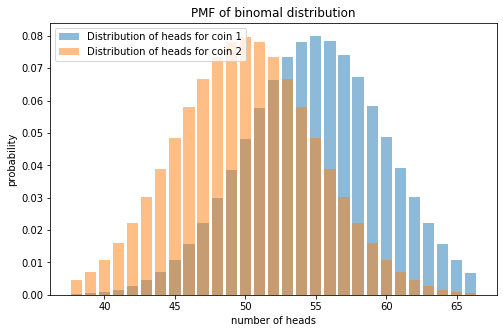

In [55]:
plt.figure(figsize=(8,5))
s2_samples_n, s2_samples_p = 100, 0.5
s1_samples_n, s1_samples_p = 100, 0.55
x = np.arange(binom.ppf(0.01, s1_samples_n, s1_samples_p)-5,binom.ppf(0.99, s2_samples_n, s2_samples_p)+5)
plt.bar(x, binom.pmf(x, n=s1_samples_n, p=s1_samples_p), alpha=0.5, label='Distribution of heads for coin 1')
plt.bar(x, binom.pmf(x, n=s2_samples_n, p=s2_samples_p), alpha=0.5, label='Distribution of heads for coin 2')
plt.title('PMF of binomal distribution')
plt.legend(loc="upper left"), plt.xlabel('number of heads'), plt.ylabel('probability')
plt.show()

From the PMF, we could see that the distribution of the 2nd coin peaks at 55, which means out of 100 coin flips, the 2nd coin gets 55 heads most of the time. On the other hand, the 1st coin gets 50 heads most of the time. We could also see some probability of obtaining other numbers depending on the variance.

### 2-tail hypothesis testing

Null Hypothesis($H_{0}$): There is <b>NO</b> difference between the 2 coins.

Alternative hypothesis($H_{1}$): There is a difference between the 2 coins.

#### Calculate 2-samples z-test for difference in proportions

\begin{align}
Z
&= \frac{ p_1 - p_2}{\sqrt{\hat{p} (1 - \hat{p}) \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
\end{align}
where pooled variance is:
$$\hat{p} = \frac{x_1+x_2}{n_1+n_2} $$

In [56]:
# manual method
pool_prop = (int(s1_samples_n* s1_samples_p) + int(s2_samples_n* s2_samples_p))/(s1_samples_n+s2_samples_n)
z_score = (s1_samples_p-s2_samples_p)/np.sqrt( pool_prop*(1-pool_prop)*((1/s1_samples_n)+(1/s2_samples_n) ) )
pool_prop, z_score, (1-norm.cdf(abs(z_score)))*2

(0.525, 0.7079923254047893, 0.47895002342035786)

Again, we could use the <a href='https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html'> statsmodel's z-test function</a> to run the test in 1-liner:

In [57]:
#NOTE these parameters: 
#count: number of successes, nobs: number of trials, alternative: The alt hypo
from statsmodels.stats.proportion import proportions_ztest
count = np.array([ int(s1_samples_n* s1_samples_p), int(s2_samples_n* s2_samples_p)])
nobs = np.array([s1_samples_n, s2_samples_n])
z_score, p_val = proportions_ztest(count, nobs=nobs, alternative='two-sided')
z_score, p_val

(0.7079923254047893, 0.478950023420358)

### Choosing 2 tail vs 1 tail test

In practice, you should use a one‐tailed test only when you have good reason to expect that the difference will be in a particular direction. A two‐tailed test is more conservative than a one‐tailed test because a two‐tailed test takes a more extreme test statistic to reject the null hypothesis.

## >2 samples Hypothesis testing for different means (to be continued)

### ANOVA test
When we want to compare the means between more than 2 samples, we need to use the ANOVA test. It compares two types of variation, the variation between the sample means, as well as the variation within each of the samples. It tells us if there is a difference between the groups but not exactly which one.

The 1-way ANOVA formula, which gives us the F-statistic:

$$ F=\frac{\text{Explained variance(between groups)}}{\text{Unexplained variance(within groups)}}  = \frac{\text{Sum of squares between groups}}{\text{Sum of squares for error}} = \frac{MST}{MSE} $$

Like the z-test, we would use find the critical value on the F distribution to determine significant.